In [1]:
import pandas_datareader as pdr
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df=pdr.get_data_yahoo('RELIANCE.NS',start='2016-01-01',end='2021-01-01')

In [13]:
test=pdr.get_data_yahoo('RELIANCE.NS',start='2021-01-01',end='2021-12-31')

In [14]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,504.666260,499.366516,500.158997,502.907928,2499742.0,484.996368
2016-01-04,502.140198,488.717438,497.781525,492.977081,13923887.0,475.419250
2016-01-05,500.258057,493.819092,495.453583,497.855835,6897687.0,480.124237
2016-01-06,514.324707,495.503113,499.069336,511.253815,12349673.0,493.044983
2016-01-07,509.173553,499.292206,505.731171,501.867798,9109980.0,483.993286


In [15]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-28,2018.000000,1995.300049,2006.699951,2003.300049,7947719.0,1996.876221
2020-12-29,2012.300049,1982.550049,2009.000000,1990.050049,8589407.0,1983.668701
2020-12-30,2007.199951,1975.550049,1995.250000,1995.500000,10173132.0,1989.101196
2020-12-31,2011.900024,1978.599976,1993.500000,1985.300049,8667516.0,1978.933960
2021-01-01,1997.000000,1982.000000,1988.000000,1987.500000,4622002.0,1981.126831


In [16]:
test.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,1997.000000,1982.000000,1988.000000,1987.500000,4622002.0,1981.126831
2021-01-04,1998.900024,1968.000000,1995.099976,1990.849976,11312992.0,1984.466064
2021-01-05,1983.599976,1956.000000,1969.000000,1966.099976,11132803.0,1959.795410
2021-01-06,1966.000000,1905.150024,1965.900024,1914.250000,21414270.0,1908.111694
2021-01-07,1945.000000,1905.150024,1920.500000,1911.150024,14918406.0,1905.021729


In [17]:
df=df[['Close']].copy()

In [46]:
test=test[['Close']].copy()

In [54]:
test.shape

(248, 1)

In [18]:
df.head()

,Close
Date,
2016-01-01,502.907928
2016-01-04,492.977081
2016-01-05,497.855835
2016-01-06,511.253815
2016-01-07,501.867798


In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
result=adfuller(df.Close.dropna())
print("AdY statistics",result[0])
print("p-value",result[1])

AdY statistics -0.36222270208803176
p-value 0.9162177348712954


In [21]:
from statsmodels.graphics.tsaplots import plot_acf

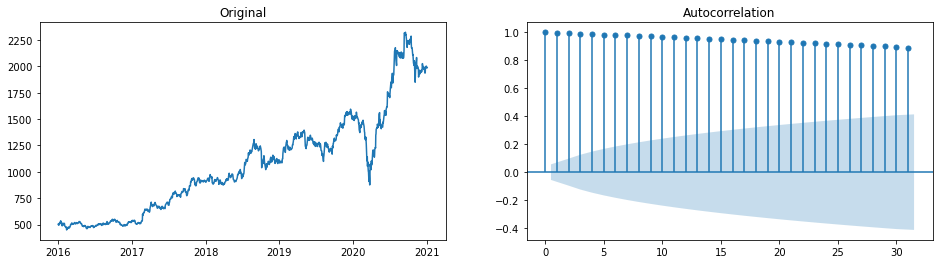

In [22]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(df.Close)
ax1.set_title("Original")
plot_acf(df.Close,ax=ax2);

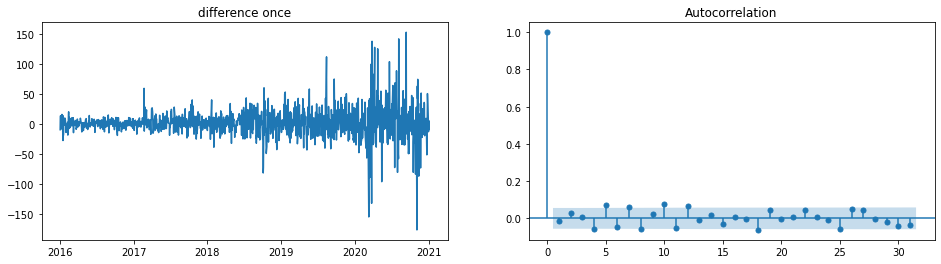

In [23]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference once")
plot_acf(diff,ax=ax2);

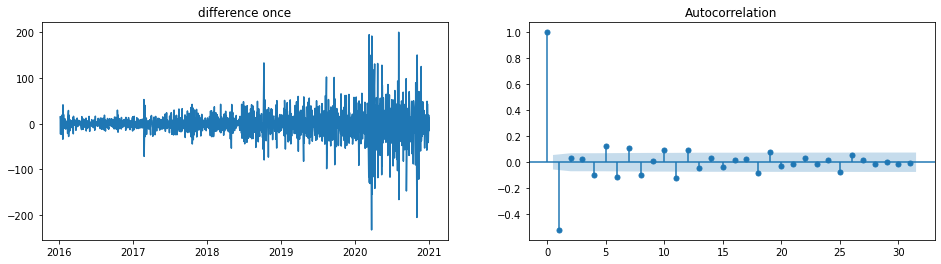

In [24]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference once")
plot_acf(diff,ax=ax2);

In [25]:
from pmdarima.arima.utils import ndiffs

In [26]:
d=df.copy()
ndiffs(d.Close,test="adf")

1

p

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf

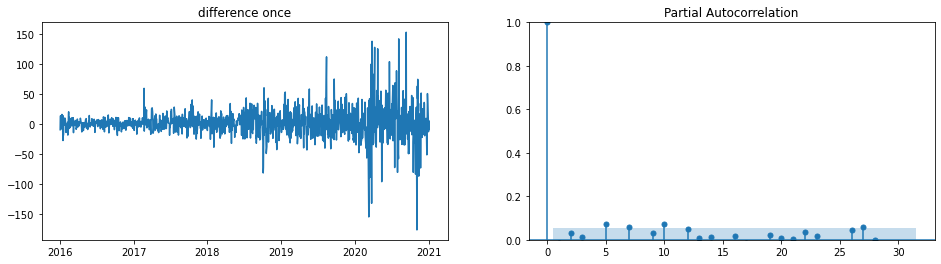

In [28]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference once")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

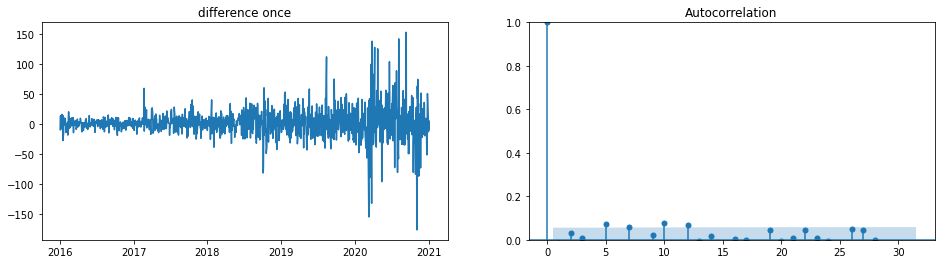

In [29]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference once")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [32]:
model=ARIMA(df.Close.dropna(),order=(10,1,10))
result=model.fit(disp=0)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimiza

In [33]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1234
Model:               ARIMA(10, 1, 10)   Log Likelihood               -5608.614
Method:                       css-mle   S.D. of innovations             22.683
Date:                Wed, 02 Mar 2022   AIC                          11261.228
Time:                        07:01:24   BIC                          11373.825
Sample:                             1   HQIC                         11303.584
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.1996      0.674      1.779      0.075      -0.122       2.521
ar.L1.D.Close     -0.5525      0.295     -1.874      0.061      -1.130       0.025
ar.L2.D.Close      0.0095      0.214

In [34]:
model1=ARIMA(df.Close.dropna(),order=(5,1,5)) 
result1=model.fit(disp=0)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

In [35]:
print(result1.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1234
Model:               ARIMA(10, 1, 10)   Log Likelihood               -5608.614
Method:                       css-mle   S.D. of innovations             22.683
Date:                Wed, 02 Mar 2022   AIC                          11261.228
Time:                        07:06:13   BIC                          11373.825
Sample:                             1   HQIC                         11303.584
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.1996      0.674      1.779      0.075      -0.122       2.521
ar.L1.D.Close     -0.5525      0.295     -1.874      0.061      -1.130       0.025
ar.L2.D.Close      0.0095      0.214

In [36]:
model2=ARIMA(df.Close.dropna(),order=(10,1,5))
result2=model.fit(disp=0)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

In [37]:
print(result2.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1234
Model:               ARIMA(10, 1, 10)   Log Likelihood               -5608.614
Method:                       css-mle   S.D. of innovations             22.683
Date:                Wed, 02 Mar 2022   AIC                          11261.228
Time:                        07:08:22   BIC                          11373.825
Sample:                             1   HQIC                         11303.584
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.1996      0.674      1.779      0.075      -0.122       2.521
ar.L1.D.Close     -0.5525      0.295     -1.874      0.061      -1.130       0.025
ar.L2.D.Close      0.0095      0.214

In [38]:
model3=ARIMA(df.Close.dropna(),order=(5,1,10))
result3=model.fit(disp=0)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

In [39]:
print(result3.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1234
Model:               ARIMA(10, 1, 10)   Log Likelihood               -5608.614
Method:                       css-mle   S.D. of innovations             22.683
Date:                Wed, 02 Mar 2022   AIC                          11261.228
Time:                        07:10:49   BIC                          11373.825
Sample:                             1   HQIC                         11303.584
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.1996      0.674      1.779      0.075      -0.122       2.521
ar.L1.D.Close     -0.5525      0.295     -1.874      0.061      -1.130       0.025
ar.L2.D.Close      0.0095      0.214

In [57]:
step=240
fc,se,conf=result.forecast(step)

In [58]:
fc=pd.Series(fc,index=test[:step].index)
lower=pd.Series(conf[:,0],index=test[:step].index)
upper=pd.Series(conf[:,1],index=test[:step].index)

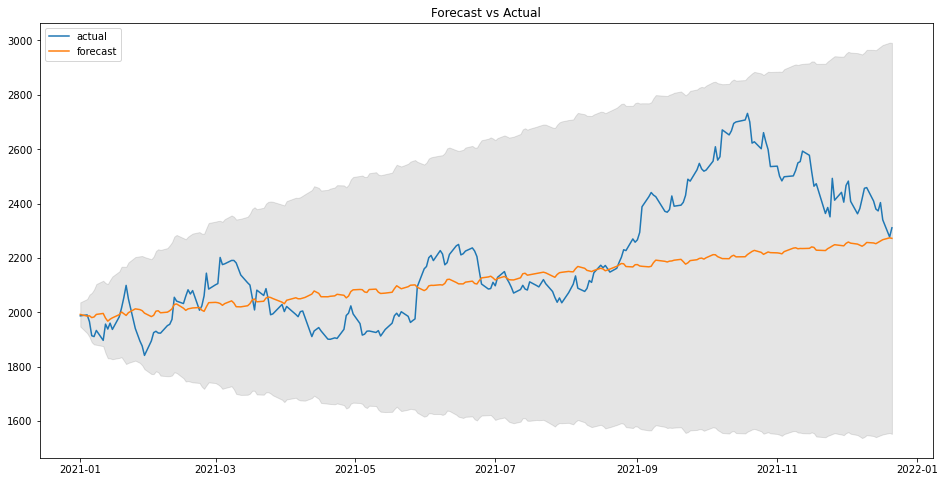

In [59]:
plt.figure(figsize=(16,8))
plt.plot(test[:step],label="actual")
plt.plot(fc,label="forecast")
plt.fill_between(lower.index,lower,upper,color="k",alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")

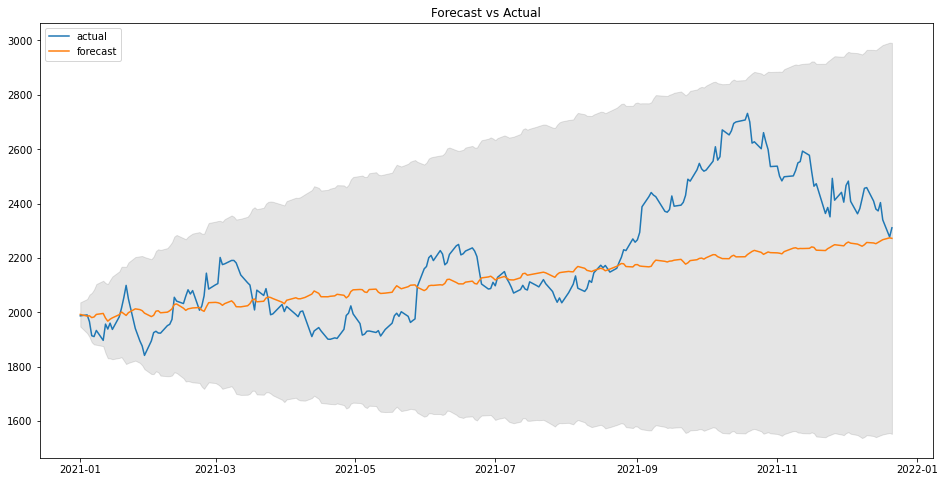

In [60]:
step=240
fc1,se1,conf1=result1.forecast(step)
fc1=pd.Series(fc1,index=test[:step].index)
lower1=pd.Series(conf1[:,0],index=test[:step].index)
upper1=pd.Series(conf1[:,1],index=test[:step].index)
plt.figure(figsize=(16,8))
plt.plot(test[:step],label="actual")
plt.plot(fc,label="forecast")
plt.fill_between(lower1.index,lower1,upper1,color="k",alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")

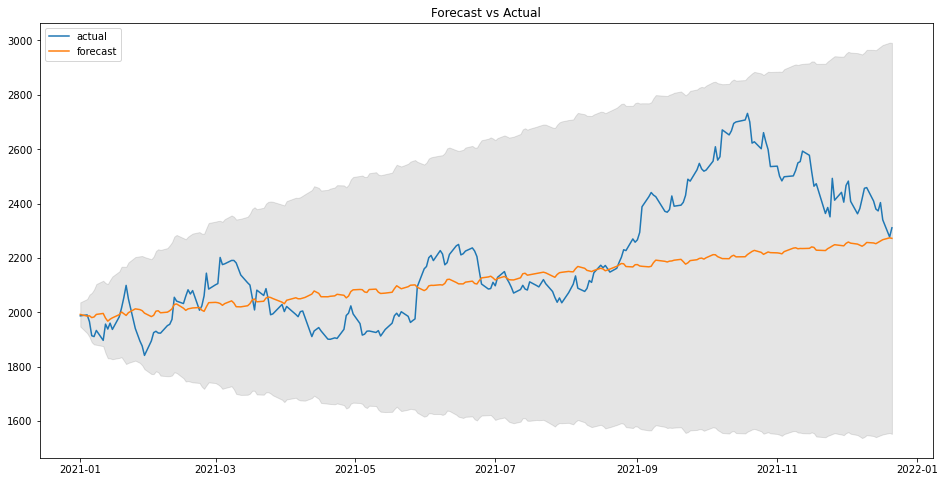

In [64]:
step=240
fc2,se2,conf2=result2.forecast(step)
fc2=pd.Series(fc2,index=test[:step].index)
lower2=pd.Series(conf2[:,0],index=test[:step].index)
upper2=pd.Series(conf2[:,1],index=test[:step].index)
plt.figure(figsize=(16,8))
plt.plot(test[:step],label="actual")
plt.plot(fc,label="forecast")
plt.fill_between(lower2.index,lower2,upper2,color="k",alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")

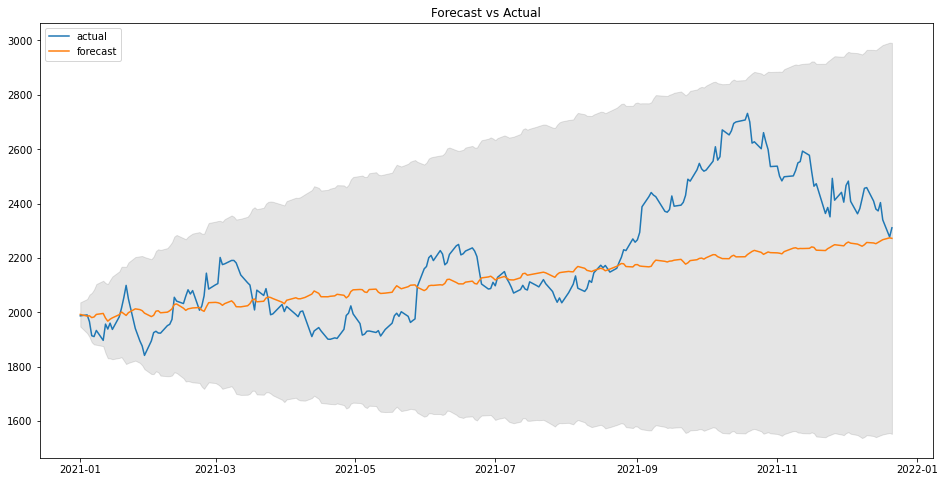

In [62]:
step=240
fc3,se3,conf3=result3.forecast(step)
fc3=pd.Series(fc3,index=test[:step].index)
lower3=pd.Series(conf3[:,0],index=test[:step].index)
upper3=pd.Series(conf3[:,1],index=test[:step].index)
plt.figure(figsize=(16,8))
plt.plot(test[:step],label="actual")
plt.plot(fc,label="forecast")
plt.fill_between(lower3.index,lower3,upper3,color="k",alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")

In [75]:
arr=np.array((test[:step].Close))

In [76]:
arr

array([1987.5       , 1990.84997559, 1966.09997559, 1914.25      ,
       1911.15002441, 1933.69995117, 1897.25      , 1957.05004883,
       1938.80004883, 1960.59997559, 1937.44995117, 1983.94995117,
       2016.40002441, 2054.69995117, 2099.39990234, 2049.60009766,
       1941.        , 1895.        , 1876.55004883, 1841.94995117,
       1895.30004883, 1925.80004883, 1930.65002441, 1924.30004883,
       1923.75      , 1951.44995117, 1956.15002441, 1974.30004883,
       2055.69995117, 2041.59997559, 2032.59997559, 2059.5       ,
       2083.25      , 2067.69995117, 2080.30004883, 2008.09997559,
       2023.44995117, 2061.        , 2144.35009766, 2085.80004883,
       2101.69995117, 2106.        , 2202.10009766, 2175.85009766,
       2178.69995117, 2191.10009766, 2191.05004883, 2181.94995117,
       2137.60009766, 2108.89990234, 2100.60009766, 2055.35009766,
       2009.09997559, 2082.        , 2062.39990234, 2087.5       ,
       2047.30004883, 1991.44995117, 1994.65002441, 2029.30004

In [78]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(arr,fc)
mse

32548.34662756898

In [82]:
import math
rmse=math.sqrt(mse)
rmse

180.41160336178208